 Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the CSV File

In [2]:
df_complete = pd.read_csv('loan.csv')

C:\Users\caron\AppData\Local\Temp\ipykernel_78000\2432237545.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_complete = pd.read_csv('loan.csv')


In [3]:
df_complete.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

Removing the last 57 NaN columns (except for pub_rec_bankruptcies) to make the CSV file more readable

In [4]:
emptycolumns = [x for x in range(53,105)] 
dataset = df_complete.drop(df_complete.columns[emptycolumns], axis=1)

emptycolumns = [x for x in range(-5,0)]  
dataset1 = dataset.drop(dataset.columns[emptycolumns], axis=1)

Replacing Null Values with 0 in pub_rec_bankruptcies

In [5]:
dataset1['pub_rec_bankruptcies'] = dataset1['pub_rec_bankruptcies'].fillna(0.0)

Removing all the rows with 'Current' as loan status

In [6]:
data_removed_current = dataset1[~(dataset1['loan_status']=="Current")]

In [7]:
data_removed_current["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Assigning Boolean Values to Loan Status

In [8]:
status_dict = {"Fully Paid": 0, "Charged Off": 1}
dataset_loan_bool = data_removed_current.replace({"loan_status": status_dict})

Creating a dataframe of all the relevant columns 

In [9]:
final_columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'emp_length','annual_inc','home_ownership','grade', "earliest_cr_line", "pub_rec", "int_rate", "open_acc","revol_bal", "revol_util",'loan_status', 'issue_d', 'last_pymnt_amnt','pub_rec_bankruptcies']
df = dataset_loan_bool[final_columns]

In [10]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
emp_length              1033
annual_inc                 0
home_ownership             0
grade                      0
earliest_cr_line           0
pub_rec                    0
int_rate                   0
open_acc                   0
revol_bal                  0
revol_util                50
loan_status                0
issue_d                    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
dtype: int64

Replacing Null Values with 0 in emp_length - assuming that they are either retired or unemployed

In [11]:
df['emp_length'] = df['emp_length'].fillna(0)

C:\Users\caron\AppData\Local\Temp\ipykernel_78000\631257160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'] = df['emp_length'].fillna(0)


Dropping 50 rows with empty revolving utilisation balance

In [12]:
df = df.dropna()

Removing % sign from both Interest Rates and Revolving Utilisation

In [13]:
df["revol_util"] = df["revol_util"].apply(lambda x: float(x[:-1]) )
df["int_rate"] = df["int_rate"].apply(lambda x: float(x[:-1]) )

Reseting Index

In [14]:
df = df.reset_index(drop=True)

Cleaning employement length and removing words and punctuation

In [15]:
replace_dict = {'<': '',
                'years': '',
                '\+': '',
                'year': '',
                ' ': ''}

df = df.replace({"emp_length": replace_dict}, regex=True)

Changing the data type of emp_length

In [16]:
df['emp_length'] = df['emp_length'].astype(int)

Quantifying the Grade 

In [17]:
replace_dict = {'A':700,
                'B':600,
                'C':500,
                'D':400,
                'E':300,
                'F':200,
                'G':100}

df = df.replace({"grade": replace_dict})



Cleaning and quantifying home_ownership

In [18]:
df.home_ownership.value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [19]:
replace_dict = {"NONE": 0,"OTHER": 0, "RENT": 1, "MORTGAGE": 2,"OWN": 3}

df = df.replace({"home_ownership": replace_dict})

In [20]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
emp_length                int32
annual_inc              float64
home_ownership            int64
grade                     int64
earliest_cr_line         object
pub_rec                   int64
int_rate                float64
open_acc                  int64
revol_bal                 int64
revol_util              float64
loan_status               int64
issue_d                  object
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

Converting the Earliest Credit Line Date and Issue Date to DateTime format

In [21]:
df['earliest_cr_line'] = df["earliest_cr_line"].apply(lambda x: '01-' + x + ' 00:00:00' )

In [22]:
df['issue_d'] = df["issue_d"].apply(lambda x: '01-' + x + ' 00:00:00' )

In [23]:
df['issue_d'] =  pd.to_datetime(df['issue_d'])

In [24]:
df['earliest_cr_line'] =  pd.to_datetime(df['earliest_cr_line'])

Creating a new column "Credit History" which is the difference of the issue date and Earliest Credit Line Date

In [25]:
df["credit_length"] = df['issue_d'] - df['earliest_cr_line']

In [26]:
df["credit_length"] = df["credit_length"].dt.days

Dropping issue_d and earliest_cr_length

In [27]:
df = df.drop(df[['issue_d', 'earliest_cr_line']], axis = 1)

Creating a new column called diff_approved which is the percentage of the difference between the amount they applied for and the approved amount

In [28]:
df["diff_approved"] = (df['loan_amnt']-df['funded_amnt'])/df['loan_amnt']

Creating a new column called credit_score which is a combination 11 different columns and we're trying to find the weights of the columns for the maximum correlation between loan_status and credit_score

In [29]:
import random

temp = []
weight = []
for i in range(10000):
    a = random.uniform(0.05,0.1)
    b = random.uniform(0.05,0.1)
    c = random.uniform(00.05,0.1)
    d = random.uniform(0.05,0.1)
    e = random.uniform(0.1,0.2)
    f = random.uniform(0.05,0.1)
    g = random.uniform(0.1,0.2)
    h = random.uniform(0.05,0.1)
    i = random.uniform(0.05,0.1)
    j = random.uniform(0.05,0.1)
    k = random.uniform(0.05,0.1)
    df["credit_score"] =  -a*(df.revol_util/df.revol_util.median()) + b*(df.open_acc/df.open_acc.median()) - c*(df.pub_rec/df.pub_rec.mean()) + d*(df.credit_length/df.credit_length.median()) + e*(df.last_pymnt_amnt/df.last_pymnt_amnt.median()) - f*(df.diff_approved/df.diff_approved.mean()) + g*(df.grade/df.grade.median()) - h*(df.loan_amnt/df.loan_amnt.median()) + i*(df.emp_length/df.emp_length.median())+ j*(df.annual_inc/df.annual_inc.median()) - k*(df.int_rate/df.int_rate.median())
    temp.append(float(df["credit_score"].corr(df["loan_status"])))
    weight.append([a,b,c,d,e,f,g,h,i,j,k])

In [30]:
df["credit_score"]

0        0.355167
1        0.171067
2        0.278910
3        0.475938
4        0.321573
           ...   
38522    0.549755
38523    0.280982
38524    0.351445
38525    0.623724
38526    0.020313
Name: credit_score, Length: 38527, dtype: float64

In [31]:
max(temp)

-0.2214363816780036

In [32]:
weight[temp.index(max(temp))]

[0.08618063582022001,
 0.0817472548270955,
 0.09659919326648575,
 0.05437272061933355,
 0.10286147349884449,
 0.09871727412404231,
 0.11130228112247474,
 0.052007674505372664,
 0.09444333355576574,
 0.055584455363685926,
 0.05867773325607773]

In [33]:
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,emp_length,annual_inc,home_ownership,grade,pub_rec,int_rate,open_acc,revol_bal,revol_util,loan_status,last_pymnt_amnt,pub_rec_bankruptcies,credit_length,diff_approved,credit_score
loan_amnt,1.000000,0.981766,0.937927,0.155693,0.268899,0.104879,-0.288072,-0.050140,0.302810,0.176318,0.313514,0.063489,0.060023,0.474409,-0.035302,0.152566,0.210710,0.348215
funded_amnt,0.981766,1.000000,0.956207,0.155327,0.264695,0.101623,-0.289010,-0.050720,0.306472,0.174806,0.305991,0.067356,0.057045,0.478252,-0.036351,0.146258,0.035787,0.406863
funded_amnt_inv,0.937927,0.956207,1.000000,0.163812,0.251846,0.103924,-0.264941,-0.051564,0.299112,0.161730,0.285655,0.072202,0.038464,0.468939,-0.036517,0.147090,0.022981,0.404758
emp_length,0.155693,0.155327,0.163812,1.000000,0.120924,0.193421,-0.010239,0.050543,0.011932,0.099558,0.152389,0.017860,0.007845,0.087508,0.047986,0.212811,0.018102,0.124632
annual_inc,0.268899,0.264695,0.251846,0.120924,1.000000,0.116753,-0.052006,-0.017958,0.049487,0.156794,0.277253,0.016707,-0.040487,0.143105,-0.016008,0.138234,0.051376,0.172327
home_ownership,0.104879,0.101623,0.103924,0.193421,0.116753,1.000000,0.058266,0.019672,-0.066484,0.143077,0.140423,-0.097163,-0.016389,0.086028,0.021978,0.165025,0.027904,0.093947
grade,-0.288072,-0.289010,-0.264941,-0.010239,-0.052006,0.058266,1.000000,-0.092972,-0.948247,-0.011998,-0.092451,-0.444504,-0.201212,-0.154460,-0.077367,0.073177,-0.009796,-0.026105
pub_rec,-0.050140,-0.050720,-0.051564,0.050543,-0.017958,0.019672,-0.092972,1.000000,0.098941,-0.000027,-0.060612,0.058942,0.051329,-0.033546,0.841685,0.029437,-0.005070,-0.331603
int_rate,0.302810,0.306472,0.299112,0.011932,0.049487,-0.066484,-0.948247,0.098941,1.000000,0.007607,0.095308,0.467213,0.211011,0.175265,0.084192,-0.081229,-0.009176,0.047229
open_acc,0.176318,0.174806,0.161730,0.099558,0.156794,0.143077,-0.011998,-0.000027,0.007607,1.000000,0.287420,-0.089923,-0.008261,0.081813,0.005519,0.153919,0.037749,0.112891


In [34]:
df1 = df[df.loan_status==1]
df2 = df[df.loan_status==0]

<AxesSubplot:>

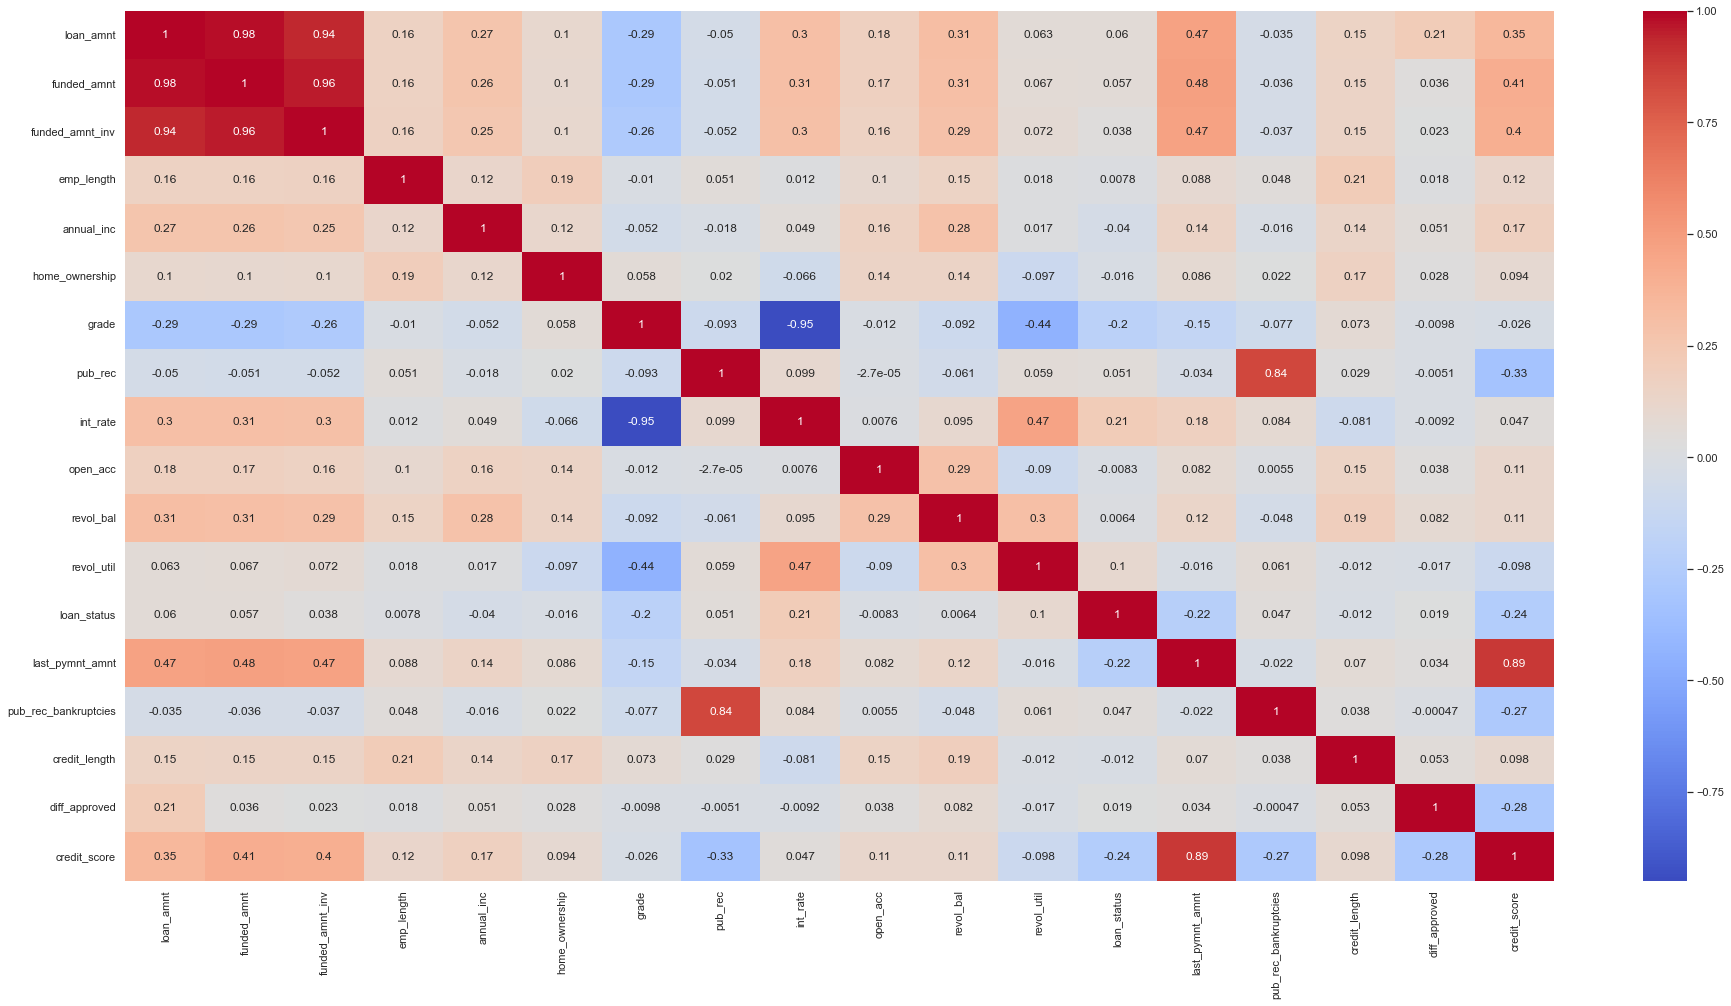

In [35]:
sns.set(rc = {'figure.figsize':(32,16)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

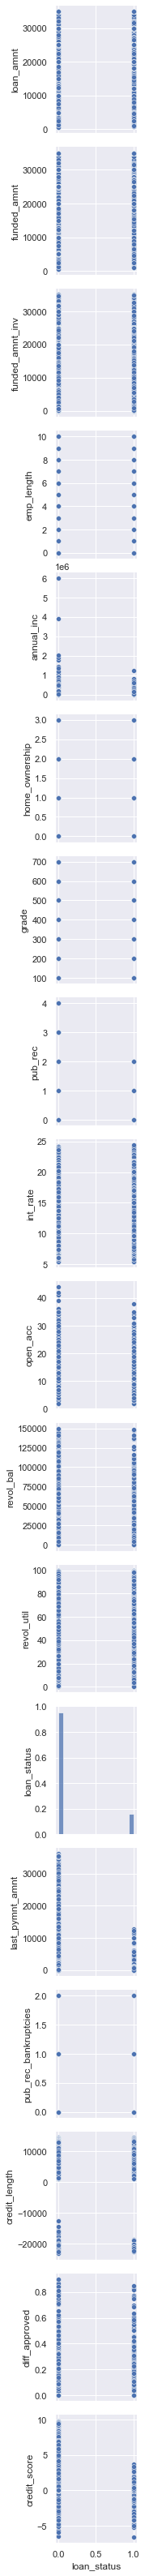

In [36]:
df_